### Homework #6 Decision Tree Regression

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In this work your goal is to get yourself familiar with Decision Tree Regression

## Task 1 Introduction
1. choose a dataset suitable for regression task. You can use www.kaggle.com or any similar resources of datasets. 
2. Describe you dataset - what kind of information does it contain, what are the features, what is the target value?

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re


wine = pd.read_csv('WineQT.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [2]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

#### fixed acidity: фиксированная кислотность.
#### volatile acidity: летучая кислотность.
#### citric acid: содержание лимонной кислоты.
#### residual sugar: остаточный сахар.
#### chlorides: содержание хлоридов.
#### free sulfur dioxide: свободный диоксид серы.
#### total sulfur dioxide: общий диоксид серы.
#### density: плотность вина.
#### pH: уровень кислотности.
#### sulphates: содержание сульфатов.
#### alcohol: содержание алкоголя.
#### quality: оценка качества (целевой признак).

## Task 2 Data preprocessing

Perform preprocessing on your data - get rid of NANs, outliers and corrupted data, encode categorical data and perform scaling if necessary.

In [3]:
from sklearn.preprocessing import StandardScaler

wine.isna().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [4]:
numeric_cols = wine.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('quality')
numeric_cols.remove('Id')
numeric_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [5]:
z_scores = np.abs((wine[numeric_cols] - wine[numeric_cols].mean()) / wine[numeric_cols].std())
wine_df_cleaned = wine[(z_scores < 3).all(axis=1)]

In [6]:
scaler = StandardScaler()
wine_df_cleaned[numeric_cols] = scaler.fit_transform(wine_df_cleaned[numeric_cols])

C:\Users\santa\AppData\Local\Temp\ipykernel_17892\2292831365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_df_cleaned[numeric_cols] = scaler.fit_transform(wine_df_cleaned[numeric_cols])


In [7]:
wine_df_cleaned

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,-0.537576,0.998054,-1.355554,-0.565858,-0.256551,-0.421175,-0.316974,0.632609,1.351132,-0.631253,-1.001126,5,0
1,-0.295282,2.050143,-1.355554,0.235150,0.788176,1.096466,0.820967,0.056990,-0.814553,0.310003,-0.612503,5,1
2,-0.295282,1.348750,-1.147222,-0.108139,0.503250,0.012436,0.372687,0.172113,-0.395388,0.074689,-0.612503,5,2
3,1.764221,-1.456820,1.561098,-0.565858,-0.304039,0.229242,0.579586,0.747733,-1.093996,-0.474377,-0.612503,6,3
4,-0.537576,0.998054,-1.355554,-0.565858,-0.256551,-0.421175,-0.316974,0.632609,1.351132,-0.631253,-1.001126,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,-1.203886,-0.112484,-0.678474,-0.108139,-0.256551,1.530077,-0.110075,-0.553167,0.722385,0.859069,0.553367,6,1592
1139,-0.901018,0.530459,-0.938890,-0.565858,-0.636452,1.421674,-0.179042,-0.109940,0.722385,1.408135,-0.903970,6,1593
1140,-1.264460,0.413560,-0.938890,-0.451428,0.408275,1.855286,0.027857,-1.036687,0.931967,-0.474377,0.067588,5,1594
1141,-1.446181,0.121313,-0.834723,-0.222569,-0.921377,2.614106,0.269238,-0.910051,1.420993,0.937507,0.747679,6,1595


# Task 3 Decision Tree Regression

Train DecisionTreeRegressor() model on your data. Use different max_depth parameter. Visualize Decision Tree.

In [25]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split

In [26]:
X = wine_df_cleaned.drop(columns=['quality', 'Id'])
y = wine_df_cleaned['quality']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
max_depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
trees = {}

In [29]:
for depth in max_depths:
    model = DecisionTreeRegressor(max_depth=depth, random_state=13)
    model.fit(X_train, y_train)
    trees[depth] = model

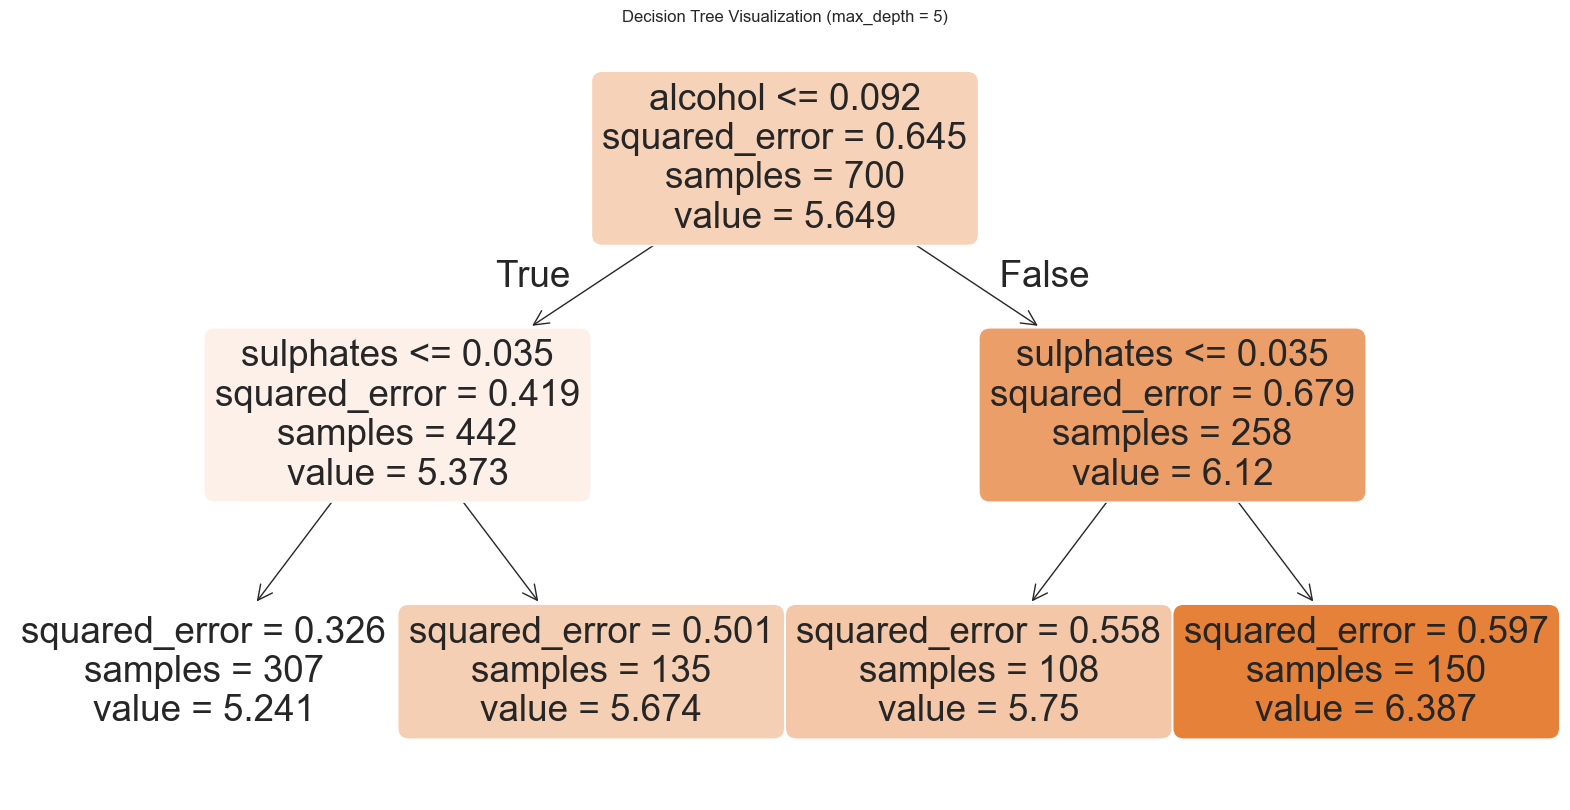

In [30]:
plt.figure(figsize=(20, 10))
plot_tree(trees[2], feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree Visualization (max_depth = 5)")
plt.show()

In [31]:
from sklearn.metrics import accuracy_score

def round_predictions(predictions):
    return np.round(predictions).astype(int)

for depth, model in trees.items():
    y_train_pred = round_predictions(model.predict(X_train))
    y_test_pred = round_predictions(model.predict(X_test))

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"Accuracy for max_depth = {depth}:")
    print(f"Train set: {train_accuracy:.4f}")
    print(f"Test set: {test_accuracy:.4f}")
    print("-" * 40)

Accuracy for max_depth = 1:
Train set: 0.5529
Test set: 0.5549
----------------------------------------
Accuracy for max_depth = 2:
Train set: 0.5700
Test set: 0.5607
----------------------------------------
Accuracy for max_depth = 3:
Train set: 0.6143
Test set: 0.5925
----------------------------------------
Accuracy for max_depth = 4:
Train set: 0.6286
Test set: 0.5838
----------------------------------------
Accuracy for max_depth = 5:
Train set: 0.6643
Test set: 0.5723
----------------------------------------
Accuracy for max_depth = 6:
Train set: 0.7200
Test set: 0.6040
----------------------------------------
Accuracy for max_depth = 7:
Train set: 0.7771
Test set: 0.6040
----------------------------------------
Accuracy for max_depth = 8:
Train set: 0.8257
Test set: 0.6127
----------------------------------------
Accuracy for max_depth = 9:
Train set: 0.8714
Test set: 0.5867
----------------------------------------
Accuracy for max_depth = 10:
Train set: 0.9143
Test set: 0.5983
